## Introduction

The FBI Gun data comes from the FBI's National Instant Criminal Background check system.
The NICS is then used by the FBI to determine whether a prospective buyer is eligible to buy firearms or explosives.
Gun shops call into the system to ensure that each customer does not have a criminal record before selling firearms to them.

This dataset includes alot of information which include; permits, type of guns purchased,
whether or not the gun was returned or rented.
On the census data, we have information on states,and all background checks done per month


## Questions posed from the dataset;
1. What is the number gun registration per capita in 2010 and 2016
2. Which states have the highest gun registration in the country

In [1]:
#To begin, there is a need to import libraries that will be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling

In [2]:
#To begin, import the FBI dataset which has already been downloaded.
#The FBI data is in excel while the census data is a csv file.

df_gun = pd.read_excel('gun_data.xlsx')
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [3]:
df_gun.shape

(12485, 27)

In [4]:
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [5]:
df_census = pd.read_csv('U.S. Census Data.csv')
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [6]:
df_census.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Population estimates, July 1, 2016, (V2016)",(c),"4,863,300",7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,...,865454,0.048,50.40%,2.50%,1.90%,"8,411,808","7,288,000",1.50%,"5,778,708",7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


## Data Wrangling

In [7]:
#Checking through the structure of the datasets in order to clean up the data

df_gun.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [8]:
df_gun.count()

month                        12485
state                        12485
permit                       12461
permit_recheck                1100
handgun                      12465
long_gun                     12466
other                         5500
multiple                     12485
admin                        12462
prepawn_handgun              10542
prepawn_long_gun             10540
prepawn_other                 5115
redemption_handgun           10545
redemption_long_gun          10544
redemption_other              5115
returned_handgun              2200
returned_long_gun             2145
returned_other                1815
rentals_handgun                990
rentals_long_gun               825
private_sale_handgun          2750
private_sale_long_gun         2750
private_sale_other            2750
return_to_seller_handgun      2475
return_to_seller_long_gun     2750
return_to_seller_other        2255
totals                       12485
dtype: int64

In [9]:
#From the above discovery, there seems to be a lot of missing datas from other columns except the totals column
#there is a need to fix this. 

type(df_gun['month'][0])

str

In [10]:
type(df_gun['state'][0])

str

In [11]:
#Both the month and the state columns are string objects, as such they are not numeric values.
#uncover the census data structure and types to ascertain information.

df_census.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


In [12]:
df_census.count()

Fact              80
Fact Note         28
Alabama           65
Alaska            65
Arizona           65
Arkansas          65
California        65
Colorado          65
Connecticut       65
Delaware          65
Florida           65
Georgia           65
Hawaii            65
Idaho             65
Illinois          65
Indiana           65
Iowa              65
Kansas            65
Kentucky          65
Louisiana         65
Maine             65
Maryland          65
Massachusetts     65
Michigan          65
Minnesota         65
Mississippi       65
Missouri          65
Montana           65
Nebraska          65
Nevada            65
New Hampshire     65
New Jersey        65
New Mexico        65
New York          65
North Carolina    65
North Dakota      65
Ohio              65
Oklahoma          65
Oregon            65
Pennsylvania      65
Rhode Island      65
South Carolina    65
South Dakota      65
Tennessee         65
Texas             65
Utah              65
Vermont           65
Virginia     

In [13]:
#There are definitely some missing information in the dataset and will be cleaned up.
#There is a need to also check if the state columns are also same data type as that of gun data.

type(df_census['New Jersey'][0])

str

In [14]:
#check the index of the census data
index_census = df_census.iloc[0].index
index_census

Index(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [15]:
#In order to have just the states as the indexes, there is a need to remove the fact and facts note from the indexes

index_census = index_census[2:]
index_census

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [16]:
#The index should have been reduced, 
#check!

len(index_census)

50

In [17]:
#There is a need to also check the states column for the gun data to confirm that it corresponds with that of the census data
#By grouping by state

index_gun = df_gun.groupby('state').sum().index
index_gun

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Mariana Islands', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object', name='state')

In [18]:
len(index_gun)

55

In [19]:
#The data does not correspond as the states in the un data is more than the ones o the census data.
#Let's find out what states are missing in the census data

for i in index_gun:
    if i not in index_census:
        print(i)

District of Columbia
Guam
Mariana Islands
Puerto Rico
Virgin Islands


In [20]:
#These are the five states that do not exist in the census dataset and will have to be removed in order to have the same index number as that of the census data.

# Q1. What census data is most associated with high gun registration?
#There is a need to establish a relationship between the two datasets and only the the total is needed in this regard.
#The monthly data for each state will be grouped and summed.


gun_state = df_gun.groupby('state')

In [21]:
sum_gun_state = gun_state.sum()

In [22]:
s_gun_state = sum_gun_state['totals']

In [23]:
s_gun_state.head()

state
Alabama        6706079
Alaska         1137643
Arizona        4425714
Arkansas       3752633
California    19014063
Name: totals, dtype: int64

In [24]:
#Now we will transpose the df for census data to match that of the gun data

df_census_t = df_census.T
df_census_t

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,10.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,14.20%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#make the census numerical variables into a dictionary function

dict_census_vars = {}
for i in range(64): 
    dict_census_vars[i] = df_census['Fact'][i]
    print(i, df_census['Fact'][i])

0 Population estimates, July 1, 2016,  (V2016)
1 Population estimates base, April 1, 2010,  (V2016)
2 Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
3 Population, Census, April 1, 2010
4 Persons under 5 years, percent, July 1, 2016,  (V2016)
5 Persons under 5 years, percent, April 1, 2010
6 Persons under 18 years, percent, July 1, 2016,  (V2016)
7 Persons under 18 years, percent, April 1, 2010
8 Persons 65 years and over, percent,  July 1, 2016,  (V2016)
9 Persons 65 years and over, percent, April 1, 2010
10 Female persons, percent,  July 1, 2016,  (V2016)
11 Female persons, percent, April 1, 2010
12 White alone, percent, July 1, 2016,  (V2016)
13 Black or African American alone, percent, July 1, 2016,  (V2016)
14 American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)
15 Asian alone, percent, July 1, 2016,  (V2016)
16 Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)
17 Two or More Races, percent, 

In [26]:
#in order to calulate the correlation between the cenuss and the un data to find out which variable is most assoicted with gun purchase,
#First remove the state column as it will not be needed
#remove the 5 missing states from the gun data

s_gun_state = s_gun_state.drop([
'District of Columbia',
'Guam',
'Mariana Islands',
'Puerto Rico',
'Virgin Islands'])

In [27]:
#Now let's calculate the correlation using the pearson's correlation coefficient
#There is a need to make a helper method to parse the string percentage data with '%' symbol

def parse_str_percent(string_percent):
    return float(string_percent.strip('%'))/100

In [28]:
def get_correlation(s_gun_state_totals, column_num):
    '''
    This method first parse the numeric-like string data, and then calculate the correlation coefficient
    The column_num parameter will get the column names from df_census_t
    '''
    series_x = df_census_t[column_num][2:]
    #print(type(series_x[0]))
    for i in range(len(series_x)):
        series_x[i] = series_x[i].replace('$','')
        if (series_x[i][-1]=='%'):
            series_x[i]=parse_str_percent(series_x[i])
        elif (series_x[i][-1]!='%'):
            try:
                series_x[i]=str(series_x[i].replace(',',''))
            except ValueError:
                try:
                    series_x[i]=float(series_x[i].replace(',',''))
                except ValueError:
                    series_x[i]=np.nan
    series_x.fillna(series_x.mean(),inplace=True)
    return correlation(s_gun_state_totals, series_x)

In [29]:
#Calculating the correlation coefficients with each state's 'totals' gun data for all numerical variables in census data

df_gun.corr()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
permit,1.000000,-0.000789,0.224378,0.140965,0.103810,0.082334,-0.011036,0.030907,0.008439,0.031592,...,-0.008116,-0.002122,-0.020504,0.005227,0.005250,-0.005428,0.022495,0.008210,0.032151,0.845017
permit_recheck,-0.000789,1.000000,0.139869,0.077588,-0.032100,0.142441,-0.026310,-0.064652,-0.074635,-0.022275,...,-0.021919,-0.010157,-0.007498,-0.027265,-0.028319,-0.032865,-0.038001,-0.040325,-0.035250,0.201974
handgun,0.224378,0.139869,1.000000,0.580564,0.411639,0.372346,0.031360,0.258415,0.125898,0.089327,...,0.007836,0.001962,-0.017896,0.075219,0.067624,0.075067,0.080753,0.074629,0.037887,0.644859
long_gun,0.140965,0.077588,0.580564,1.000000,0.377475,0.272791,0.039527,0.263468,0.210167,0.065095,...,0.002498,0.108349,0.104357,0.097082,0.095472,0.092456,0.124457,0.124957,0.072177,0.578079
other,0.103810,-0.032100,0.411639,0.377475,1.000000,0.210535,0.007486,0.114301,0.056377,0.047007,...,-0.002926,0.015008,0.011276,0.082999,0.081426,0.079166,0.064909,0.073536,0.034826,0.316433
multiple,0.082334,0.142441,0.372346,0.272791,0.210535,1.000000,0.006816,0.176112,0.111099,0.096940,...,-0.013399,0.018057,-0.038204,0.078409,0.074347,0.086403,0.102774,0.099851,0.084219,0.281083
admin,-0.011036,-0.026310,0.031360,0.039527,0.007486,0.006816,1.000000,0.014621,-0.007769,-0.002707,...,-0.015610,-0.023982,-0.028525,-0.002600,-0.003663,-0.008951,0.011307,0.009288,0.002971,0.028505
prepawn_handgun,0.030907,-0.064652,0.258415,0.263468,0.114301,0.176112,0.014621,1.000000,0.773930,0.096223,...,-0.049382,0.058481,-0.028850,0.051092,0.054902,0.066764,0.082059,0.083668,0.116255,0.198499
prepawn_long_gun,0.008439,-0.074635,0.125898,0.210167,0.056377,0.111099,-0.007769,0.773930,1.000000,0.076221,...,-0.046919,0.060679,-0.027387,0.034420,0.042996,0.054060,0.062534,0.074688,0.088064,0.124783
prepawn_other,0.031592,-0.022275,0.089327,0.065095,0.047007,0.096940,-0.002707,0.096223,0.076221,1.000000,...,-0.001813,0.008696,0.006004,0.055848,0.063921,0.090281,0.049597,0.059049,0.055143,0.070150


In [30]:
df_gun.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [31]:
df_census.columns

Index(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [32]:
df_census['Fact']

0          Population estimates, July 1, 2016,  (V2016)
1     Population estimates base, April 1, 2010,  (V2...
2     Population, percent change - April 1, 2010 (es...
3                     Population, Census, April 1, 2010
4     Persons under 5 years, percent, July 1, 2016, ...
                            ...                        
80                                                   FN
81                                                  NaN
82                                                    S
83                                                    X
84                                                    Z
Name: Fact, Length: 85, dtype: object

In [33]:
df_census_t.columns

RangeIndex(start=0, stop=85, step=1)

In [34]:
 df_gun_capita = df_gun.drop([ 'permit', 'permit_recheck', 'handgun',
       'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other'], axis = 1)

In [35]:
df_gun_capita.head()

,month,state,totals
0,2017-09,Alabama,32019
1,2017-09,Alaska,6303
2,2017-09,Arizona,28394
3,2017-09,Arkansas,17747
4,2017-09,California,123506


In [36]:
df_gun_capita['month'] = pd.to_datetime(df_gun['month'])

In [37]:
df_gun_capita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   12485 non-null  datetime64[ns]
 1   state   12485 non-null  object        
 2   totals  12485 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 292.7+ KB


In [38]:
#To Get all the 2010-04-01 
df_gun_2010 = df_gun_capita[df_gun_capita['month'] == '2010-04-01']
df_gun_2010.head(5)

,month,state,totals
4895,2010-04-01,Alabama,20791
4896,2010-04-01,Alaska,6411
4897,2010-04-01,Arizona,16578
4898,2010-04-01,Arkansas,14563
4899,2010-04-01,California,80750


In [39]:
#To Get all the 2016-07-01 
df_gun_2016 = df_gun_capita[df_gun_capita['month'] == '2016-07-01' ]
df_gun_2016.head(5)

,month,state,totals
770,2016-07-01,Alabama,48927
771,2016-07-01,Alaska,6793
772,2016-07-01,Arizona,34496
773,2016-07-01,Arkansas,19378
774,2016-07-01,California,190218


In [40]:
#Now join 2010 and 2016 to be able to compare the results of the two years
concat_df_gun = pd.concat([df_gun_2010,df_gun_2016 ], keys=['2010-04-01', '2016-07-01'], axis = 0)
concat_df_gun.head()

month       state  totals
2010-04-01 4895 2010-04-01     Alabama   20791
           4896 2010-04-01      Alaska    6411
           4897 2010-04-01     Arizona   16578
           4898 2010-04-01    Arkansas   14563
           4899 2010-04-01  California   80750

In [41]:
concat_df_gun.reset_index(drop=True, inplace=True)

In [42]:
concat_df_gun.head(5)

,month,state,totals
0,2010-04-01,Alabama,20791
1,2010-04-01,Alaska,6411
2,2010-04-01,Arizona,16578
3,2010-04-01,Arkansas,14563
4,2010-04-01,California,80750


In [43]:
#To clean up the census data to match the gun data i have to drop all the columns that is not associated with gun_data and reset its index

df_census = df_census.drop(df_census.index[65: 85]).reset_index()

In [44]:
#Drop the first column 'Fact Note'
df_census = df_census.drop(['Fact Note'], axis =1 )

In [45]:
#From the df_census.head shown earlier, there are some NA values and I will be replacing them with 0

df_census= df_census.fillna(0.0)

In [46]:
#Transpose the census data to make it easy for merging with the gun data
df_census.set_index('Fact',inplace=True)
df_census = df_census.T.reset_index()

In [47]:
#check that the operation worked

df_census.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,index,0,1,2,3,4,5,6,7,8,...,55,56,57,58,59,60,61,62,63,64
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""


In [48]:
#Change the 'index column' to 'state' to match the column 'state' in gun data

df_census.rename(columns={'index':'state'},inplace = True)

In [49]:
#check that it worked

df_census.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,index,0,1,2,3,4,5,6,7,8,...,55,56,57,58,59,60,61,62,63,64
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""


In [50]:
# Create new tables to be able to convert the Population estimates, July 1, 2016, (V2016) to float to be able to do the calculation 
df_census_16 = df_census[['state', 'Population estimates, July 1, 2016,  (V2016)']] 
df_census_16.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)"
0,index,0
1,Alabama,"4,863,300"
2,Alaska,"741,894"
3,Arizona,"6,931,071"
4,Arkansas,"2,988,248"


In [51]:


#Convert to float for state 
df_census_16['state']= pd.to_numeric(df_census_16['state'], downcast='float', errors='ignore')

C:\Users\chinenyenwa.ginger\AppData\Local\Temp\ipykernel_7104\3619199008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_census_16['state']= pd.to_numeric(df_census_16['state'], downcast='float', errors='ignore')


In [52]:
df_census_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   state                                         51 non-null     object
 1   Population estimates, July 1, 2016,  (V2016)  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


In [53]:
#Convert to float and ignore the error    
df_census_16['Population estimates, July 1, 2016,  (V2016)']= pd.to_numeric(df_census_16['Population estimates, July 1, 2016,  (V2016)'], downcast='float', 
errors='ignore')

C:\Users\chinenyenwa.ginger\AppData\Local\Temp\ipykernel_7104\2434556629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_census_16['Population estimates, July 1, 2016,  (V2016)']= pd.to_numeric(df_census_16['Population estimates, July 1, 2016,  (V2016)'], downcast='float',


In [54]:
df_census_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   state                                         51 non-null     object
 1   Population estimates, July 1, 2016,  (V2016)  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


In [55]:
df_census_16['Population estimates, July 1, 2016,  (V2016)'].dtypes

dtype('O')

In [56]:
df_census_16['Population estimates, July 1, 2016,  (V2016)'].fillna(np.nan)

0              0
1      4,863,300
2        741,894
3      6,931,071
4      2,988,248
5     39,250,017
6      5,540,545
7      3,576,452
8        952,065
9     20,612,439
10    10,310,371
11     1,428,557
12     1,683,140
13    12,801,539
14     6,633,053
15     3,134,693
16     2,907,289
17     4,436,974
18     4,681,666
19     1,331,479
20     6,016,447
21     6,811,779
22     9,928,300
23     5,519,952
24     2,988,726
25     6,093,000
26     1,042,520
27     1,907,116
28     2,940,058
29     1,334,795
30     8,944,469
31       2081015
32      19745289
33      10146788
34        757952
35      11614373
36       3923561
37       4093465
38      12784227
39       1056426
40       4961119
41        865454
42       6651194
43    27,862,596
44     3,051,217
45       624,594
46     8,411,808
47     7,288,000
48     1,831,102
49     5,778,708
50       585,501
Name: Population estimates, July 1, 2016,  (V2016), dtype: object

In [57]:
df_census_16['Population estimates, July 1, 2016,  (V2016)'].str.strip(",")

0            NaN
1      4,863,300
2        741,894
3      6,931,071
4      2,988,248
5     39,250,017
6      5,540,545
7      3,576,452
8        952,065
9     20,612,439
10    10,310,371
11     1,428,557
12     1,683,140
13    12,801,539
14     6,633,053
15     3,134,693
16     2,907,289
17     4,436,974
18     4,681,666
19     1,331,479
20     6,016,447
21     6,811,779
22     9,928,300
23     5,519,952
24     2,988,726
25     6,093,000
26     1,042,520
27     1,907,116
28     2,940,058
29     1,334,795
30     8,944,469
31       2081015
32      19745289
33      10146788
34        757952
35      11614373
36       3923561
37       4093465
38      12784227
39       1056426
40       4961119
41        865454
42       6651194
43    27,862,596
44     3,051,217
45       624,594
46     8,411,808
47     7,288,000
48     1,831,102
49     5,778,708
50       585,501
Name: Population estimates, July 1, 2016,  (V2016), dtype: object

In [58]:
df_census_16['Population estimates, July 1, 2016,  (V2016)'].replace(",","")

0              0
1      4,863,300
2        741,894
3      6,931,071
4      2,988,248
5     39,250,017
6      5,540,545
7      3,576,452
8        952,065
9     20,612,439
10    10,310,371
11     1,428,557
12     1,683,140
13    12,801,539
14     6,633,053
15     3,134,693
16     2,907,289
17     4,436,974
18     4,681,666
19     1,331,479
20     6,016,447
21     6,811,779
22     9,928,300
23     5,519,952
24     2,988,726
25     6,093,000
26     1,042,520
27     1,907,116
28     2,940,058
29     1,334,795
30     8,944,469
31       2081015
32      19745289
33      10146788
34        757952
35      11614373
36       3923561
37       4093465
38      12784227
39       1056426
40       4961119
41        865454
42       6651194
43    27,862,596
44     3,051,217
45       624,594
46     8,411,808
47     7,288,000
48     1,831,102
49     5,778,708
50       585,501
Name: Population estimates, July 1, 2016,  (V2016), dtype: object

In [59]:
df_census_16['Population estimates, July 1, 2016,  (V2016)'].apply(float)

ValueError: could not convert string to float: '4,863,300'

In [ ]:
try:
    x=int(df_census_16['Population estimates, July 1, 2016,  (V2016)'])
except:
    print("Error in converting to string")

In [ ]:
df_census1 = (float(df_census_16['Population estimates, July 1, 2016,  (V2016)'].sum()))
df_census1

In [ ]:
df_census_10 = df_census[['state','Population estimates base, April 1, 2010,  (V2016)']]
df_census_10.head()

In [ ]:
#Create a new table for 2010
df_census_10 = df_census[['state','Population estimates base, April 1, 2010,  (V2016)']]
df_census_10.head()

In [ ]:
# Create new tables to be able to convert the Population estimates base, April 1, 2010, (V2016) to float to be able to do the calculation

#Convert to float 
df_census_10['state']= pd.to_numeric(df_census_10['state'], downcast='float', errors='ignore')

In [ ]:
df_census_16.reset_index(drop = True).head()

In [ ]:
#Now I will merge the cenus data and the gun data

df_census_10 = df_census[['state','Population estimates base, April 1, 2010,  (V2016)']]
df_census_10.head()

In [ ]:
#Replace ',' to this ''.  because I am getting errors that my data types are not same.
df_census_10['Population estimates base, April 1, 2010,  (V2016)'].replace(to_replace=',',value=r'',regex=True,inplace=True)

In [ ]:
df_census_10.head()

In [ ]:
#Display df_census_16 and reset it
df_census_16.reset_index(drop = True).head()

In [ ]:
#Display gun_2010 and reset it
df_gun_2010= df_gun_2010.reset_index(drop= True)
df_gun_2010.head()

In [ ]:
#Display it and reset it
df_gun_2016 = df_gun_2016.reset_index(drop= True)
df_gun_2016.head()

In [ ]:
#Display concat_gun; it is a cleaned version
concat_df_gun.head()

In [ ]:
#Q1: what is the Gun per capita 2010-2016

#Merge census data 2010 and 2016
census_merge = df_census_10.merge(df_census_16, on='state', how='left')
census_merge.head()

In [ ]:
# Convert to a percentage 
def percent(value):
    if value > 0.001:
        result = value *100
    return result 

In [ ]:
#Merge gun data 2010 and 2016
gun_merge = df_gun_2010.merge(df_gun_2016, on='state', how='left')
gun_merge.head()

In [ ]:
gun_merge['totals_x'].sum()

In [ ]:
census_merge['Population estimates, July 1, 2016,  (V2016)'].describe()

In [ ]:
# Checking gun per capita in 2010
capita_2010 = gun_merge['totals_x'].sum()/census_merge['Population estimates base, April 1, 2010,  (V2016)'].sum()
capita_2010

In [ ]:
#Convert to percentage
percent(capita_2016)

#Gun per capita in 2016 is 0.6783112532996495

In [60]:
#q2. What state has the highest gun permit in 2017

#Make a new table 2017 
df_gun_017 = df_gun[df_gun['month'] == '2017-09' ]
df_gun_017.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [61]:
df_gun_017.info

<bound method DataFrame.info of       month                 state    permit  permit_recheck  handgun  \
0   2017-09               Alabama   16717.0             0.0   5734.0   
1   2017-09                Alaska     209.0             2.0   2320.0   
2   2017-09               Arizona    5069.0           382.0  11063.0   
3   2017-09              Arkansas    2935.0           632.0   4347.0   
4   2017-09            California   57839.0             0.0  37165.0   
5   2017-09              Colorado    4356.0             0.0  15751.0   
6   2017-09           Connecticut    4343.0           673.0   4834.0   
7   2017-09              Delaware     275.0             0.0   1414.0   
8   2017-09  District of Columbia       1.0             0.0     56.0   
9   2017-09               Florida   10784.0             0.0  39199.0   
10  2017-09               Georgia   12074.0             0.0  10933.0   
11  2017-09                  Guam       0.0             0.0     74.0   
12  2017-09                Hawai

In [62]:
#Sort it in the opposite direction 
df_gun_017.sort_values(by=['totals'], axis = 0, ascending = False).head(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
18,2017-09,Kentucky,378384.0,0.0,8112.0,7543.0,253.0,543,1.0,16.0,...,0.0,0.0,0.0,21.0,19.0,1.0,2.0,1.0,0.0,398706
46,2017-09,Texas,31390.0,0.0,39119.0,39416.0,2768.0,2473,0.0,59.0,...,0.0,0.0,0.0,121.0,87.0,13.0,2.0,5.0,0.0,128260
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
14,2017-09,Illinois,15712.0,71432.0,18290.0,10201.0,0.0,814,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116449
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390
40,2017-09,Pennsylvania,23144.0,0.0,39825.0,13222.0,48.0,0,179.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77003
45,2017-09,Tennessee,16887.0,0.0,19219.0,13746.0,1042.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50945
37,2017-09,Ohio,8741.0,490.0,21085.0,14998.0,1202.0,1026,0.0,9.0,...,0.0,0.0,0.0,58.0,36.0,4.0,1.0,1.0,0.0,49942
15,2017-09,Indiana,18241.0,0.0,16093.0,11332.0,1123.0,597,79.0,5.0,...,0.0,0.0,0.0,75.0,57.0,6.0,4.0,4.0,0.0,48524
25,2017-09,Minnesota,25645.0,0.0,4862.0,12677.0,346.0,273,0.0,1.0,...,1.0,0.0,0.0,13.0,16.0,0.0,0.0,1.0,1.0,44552


Text(0, 0.5, 'total gun permit')

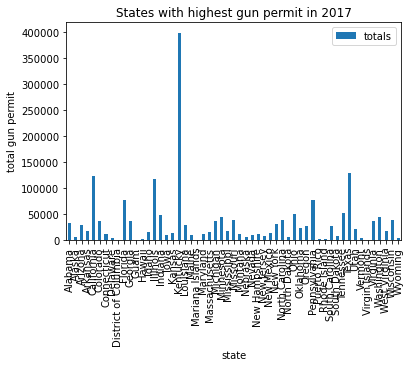

In [63]:
df_gun_017.plot(x='state', y='totals', kind='bar')
plt.title('States with highest gun permit in 2017')
plt.ylabel('total gun permit')

#List of states that have the highest gun permit in 2017

#The graph above shows the list of states with the highest gun permit in 2017

1.Kentucky
2.Texas
3.Caliifornia
4.Illinois
5.Florida
6.Pensilvania
7.Tennessee
8.Ohio
9.Indiana
10.Minnesota

<AxesSubplot:xlabel='totals', ylabel='state'>

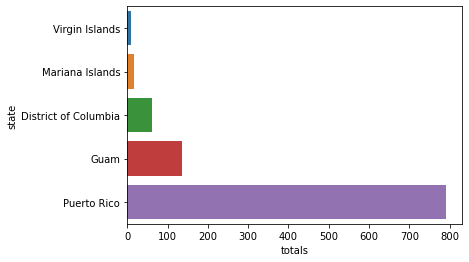

In [64]:
sns.barplot(
    x='totals',
    y ='state', data=df_gun_017.nsmallest(5, 'totals'))

The bar chart above shows the cities with the lowest gun license from the data. This could point to the fact that there are more gun violence in these cities.

## Conclusion

The gun and census datasets had similar variables which made it quite joinable to each other in order to come up with one data that brought us the per capita results.
Gun registration per capita in 2016 was 0.678%. 

The top states to look out for in number of gun registrations are kentucky, Texas, Carlifonia, Illnois, Florida, Pensilvania, etc.
Gun violence are most likely to happen in these places than anywhere else.

#Dear Reviewr,

#All Specifications have been corrected.
#However, I am having challenges which was not the case earlier and as such I am unable to plot my second graph which supposed to be the per capita visuals comparison for 2010 and 2016